# Homework 5 - Optimization

***
**Name**: __Poorwa Hirve__
***

## Goal

The goal of this assignment is to use gradient based optimization algorithms to find the minum for the Rosenbrock function and to optmizie the 1 layer MLP network you built in **Assignment 4**.

## 1. Optimizing the Rosenbrock function

More information can be found here https://en.wikipedia.org/wiki/Rosenbrock_function
    
**Note: For this assignment, we will choose a = 1 and b = 100**

- $f(x,y) = (a-x)^2 + b \cdot (y - x^2)^2 $  


- $\frac{\partial{f(x,y)}}{\partial{x}} = 2 \cdot (a-x) \cdot (-1) + b \cdot 2 \cdot (y - x^2) \cdot (-1) \cdot 2 \cdot x  $


- $\frac{\partial{f(x,y)}}{\partial{y}} = b \cdot 2 \cdot (y - x^2)  $

In [1]:
# Set random seed 
import random
import unittest
import math
from sklearn.utils import shuffle
from matplotlib import pyplot as plt


random.seed(0)

import warnings
warnings.filterwarnings('ignore')

In [2]:
def rosenbrock(a, b, x, y):
    """
    Inputs:
    a,b : parameters 
    x, y: inputs
    
    Outputs:
    out: Rosenbrock function evaluated at x and y
    """
    out = (a - x)**2 + b*(y - x**2)**2
    return out


In [3]:
def rosenbrock_grad(a, b, x, y):
    """
    Calculate gradient of the rosenbrock function wrt x and y
    
    Inputs:
    a, b: parameters
    x, y: inputs
    
    Outputs:
    grad_x, grad_y: Gradients wrt x and y
    """
    grad_x = -2*(a - x) - 4*b*(y - x**2)*x
    grad_y = 2*b*(y - x**2)
    return grad_x, grad_y


Below, you are given skeleton code for optimizing the rosenbrock function using various update rules. Following each function, there are a few function calls with specific hyperparameter choices. The outputs for these will be used to grade your work.

Termination condition: 

1. Reached the n_epochs limit 

2. The change in value of the function at $x_t,y_t$ and $x_{t+1},y_{t+1}$ is <= tolerance 

All these functions share the same structure i.e apart from the update rule (and keeping track of past variables) very little changes across these functions.

Note: since there is no randomness involved, we expect the outputs to closely match those of our implementations.

In [4]:
def rosenbrock_sgd(initial_x, initial_y, a, b, n_epochs, lr, tolerance):
    """
    Use Vanilla SGD to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: Learning rate
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    out_prev = -math.inf
    final_x = initial_x
    final_y = initial_y
    stop_epoch = 0
    for epoch in range(n_epochs):
        out = rosenbrock(a, b, final_x, final_y)
        if abs(out - out_prev) <= tolerance:
            return final_x, final_y, stop_epoch
        out_prev = out
        grad_x, grad_y = rosenbrock_grad(a, b, final_x, final_y)
        final_x = final_x - lr * grad_x
        final_y = final_y - lr * grad_y
        stop_epoch = epoch
        
    return final_x, final_y, n_epochs


In [5]:
def rosenbrock_momentum(initial_x, initial_y, a, b, n_epochs, lr, mntm, nesterov, tolerance):
    """
    Use momentum to optimize the Rosenbrock function
    
    Tip: While implementing nesterov update, you will need the gradient at the next step as well. 
        Instead, to simplify your implementation, you can use an alternative form of the nesterov 
        update which only uses the gradient at the current step.
        Without nesterov, your update will be -> learning_rate*(gradient + momentum*grad_history)
        With nesterov, you update will be -> lr*((1+mntm)*gradient + (mntm)^2 * grad_history)
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: Learning rate
    mntm: momentum factor
    nesterov: True if nesterov update is to be used
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    out_prev = -math.inf
    final_x = initial_x
    final_y = initial_y
    stop_epoch = 0
    if nesterov:
        _grad = 1 + mntm
        _grad_hist = mntm**2
        
    else:
        _grad = 1
        _grad_hist = mntm
        
    grad_hist_x, grad_hist_y = 0,0
            
    for epoch in range(n_epochs):
        out = rosenbrock(a, b, final_x, final_y)
        if abs(out - out_prev) <= tolerance:
            return final_x, final_y, stop_epoch
        out_prev = out
        grad_x, grad_y = rosenbrock_grad(a, b, final_x, final_y)
        
        grad_hist_x = lr * (_grad*grad_x + _grad_hist*grad_hist_x)
        grad_hist_y = lr * (_grad*grad_y + _grad_hist*grad_hist_y)
        
        final_x = final_x - grad_hist_x
        final_y = final_y - grad_hist_y

        stop_epoch = epoch
        
    return final_x, final_y, n_epochs
    

In [6]:
def rosenbrock_adagrad(initial_x, initial_y, a, b, n_epochs, lr, eps, tolerance):
    """
    Use Adagrad to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: Learning rate
    eps: The fudge factor (used in the denominator of the update to reduce numerical instability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    out_prev = -math.inf
    final_x = initial_x
    final_y = initial_y
    r_x = 0
    r_y = 0
    stop_epoch = 0
    for epoch in range(n_epochs):
        out = rosenbrock(a, b, final_x, final_y)
        if abs(out - out_prev) <= tolerance:
            return final_x, final_y, stop_epoch
        out_prev = out
        grad_x, grad_y = rosenbrock_grad(a, b, final_x, final_y)
        r_x = r_x + grad_x**2
        r_y = r_y + grad_y**2
        final_x = final_x - lr * grad_x / ((eps+r_x)**0.5)
        final_y = final_y - lr * grad_y / ((eps+r_y)**0.5)
        stop_epoch = epoch
        
    return final_x, final_y, n_epochs
    

In [7]:
def rosenbrock_adadelta(initial_x, initial_y, a, b, n_epochs, rho, eps, tolerance):
    """
    Use Adadelta to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    rho: Averaging factor
    eps: fudging factor (for numerical stability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    out_prev = -math.inf
    final_x = initial_x
    final_y = initial_y
    stop_epoch = 0
    prev_avg_x = 0
    prev_avg_y = 0
    prev_delta_x = 0
    prev_delta_y = 0
    update_x = update_y = 0
    for epoch in range(n_epochs):
        out = rosenbrock(a, b, final_x, final_y)
        if abs(out - out_prev) <= tolerance:
            return final_x, final_y, stop_epoch
        out_prev = out
        grad_x, grad_y = rosenbrock_grad(a, b, final_x, final_y)
        
        avg_x = rho * prev_avg_x + (1 - rho) * grad_x**2
        avg_y = rho * prev_avg_y + (1 - rho) * grad_y**2
        
        delta_x = rho * prev_delta_x + (1 - rho) * (update_x)**2
        delta_y = rho * prev_delta_y + (1 - rho) * (update_y)**2
        
        prev_avg_x = avg_x
        prev_avg_y = avg_y  
        
        update_x = -(delta_x + eps)**0.5 * grad_x / ((avg_x + eps)**0.5)
        update_y = -(delta_y + eps)**0.5 * grad_y / ((avg_y + eps)**0.5)
        
        final_x = final_x + update_x
        final_y = final_y + update_y
        
        prev_delta_x = delta_x
        prev_delta_y = delta_y
        
        stop_epoch = epoch
        
    return final_x, final_y, n_epochs


In [8]:
def rosenbrock_rmsprop(initial_x, initial_y, a, b, n_epochs, lr, rho, eps, tolerance):
    """
    Use RMSprop to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr:learning rate
    rho: Averaging factor
    eps: fudging factor (for numerical stability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    r_x = r_y = 0
    out_prev = -math.inf
    final_x = initial_x
    final_y = initial_y
    stop_epoch = 0
    for epoch in range(n_epochs):
        out = rosenbrock(a, b, final_x, final_y)
        if abs(out - out_prev) <= tolerance:
            return final_x, final_y, stop_epoch
        out_prev = out
        grad_x, grad_y = rosenbrock_grad(a, b, final_x, final_y)
        
        r_x = rho * r_x + (1 - rho) * grad_x**2
        r_y = rho * r_y + (1 - rho) * grad_y**2
        
        final_x = final_x - lr * grad_x / (eps+(r_x**0.5))
        final_y = final_y - lr * grad_y / (eps+(r_y**0.5))
        stop_epoch = epoch
        
    return final_x, final_y, n_epochs

In [9]:
def rosenbrock_adam(initial_x, initial_y, a, b, n_epochs, lr, beta1, beta2, eps, tolerance):
    """
    Use Adam to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: learning rate
    beta1, beta2: Averaging factors
    eps: fudging factor (for numerical stability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    out_prev = -math.inf
    final_x = initial_x
    final_y = initial_y
    stop_epoch = 0
    s_x = s_y = r_x = r_y = 0
    for epoch in range(n_epochs):
        out = rosenbrock(a, b, final_x, final_y)
        if abs(out - out_prev) <= tolerance:
            return final_x, final_y, stop_epoch
        out_prev = out
        grad_x, grad_y = rosenbrock_grad(a, b, final_x, final_y)
        
        s_x = (beta1 * s_x) + ((1 - beta1) * grad_x)
        s_y = (beta1 * s_y) + ((1 - beta1) * grad_y)
        
        r_x = (beta2 * r_x) + ((1 - beta2) * grad_x ** 2)
        r_y = (beta2 * r_y) + ((1 - beta2) * grad_y ** 2)
        
        _s_x = s_x / (1 - beta1**(epoch+1))
        _s_y = s_y / (1 - beta1**(epoch+1))
        
        _r_x = r_x / (1 - beta2**(epoch+1))
        _r_y = r_y / (1 - beta2**(epoch+1))
        
        final_x = final_x - lr * _s_x / (eps+(_r_x**0.5))
        final_y = final_y - lr * _s_y / (eps+(_r_y**0.5))

        stop_epoch = epoch
        
    return final_x, final_y, n_epochs
   

## Unit Tests

In [10]:
class TestRosenBrock(unittest.TestCase):
    def test_sgd(self):
        final_x, final_y, stop_epoch = rosenbrock_sgd(0, 0, 1, 100, 1, 0.001, 1e-06)
        self.assertAlmostEqual(final_x, 0.002, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)

        final_x, final_y, stop_epoch = rosenbrock_sgd(0, 0, 1, 100, 5, 0.001, 1e-06)
        self.assertAlmostEqual(final_x, 0.009959805751775453, places = 4)
        self.assertAlmostEqual(final_y, 2.091e-05, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_sgd(0, 0, 1, 100, 100000, 0.001, 1e-06)
        self.assertAlmostEqual(final_x, 0.965628504058544, places = 4)
        self.assertAlmostEqual(final_y, 0.932297997695398, places = 4)
        self.assertAlmostEqual(stop_epoch,  5570, places = 4)

    def test_momentum(self):
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 1, 0.001, 0.95, True, 1e-06)
        self.assertAlmostEqual(final_x, 0.0039, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 5, 0.001, 0.95, True, 1e-06)
        self.assertAlmostEqual(final_x, 0.019358983472059735, places = 4)
        self.assertAlmostEqual(final_y, 0.00013646707993741637, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 100000, 0.001, 0.95, True, 1e-06)
        self.assertAlmostEqual(final_x, 0.975228639507472, places = 4)
        self.assertAlmostEqual(final_y, 0.9509702874332484, places = 4)
        self.assertAlmostEqual(stop_epoch, 3253, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 1, 0.001, 0.95, False, 1e-06)
        self.assertAlmostEqual(final_x, 0.002, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 5, 0.001, 0.95, False, 1e-06)
        self.assertAlmostEqual(final_x, 0.00996736498329375, places = 4)
        self.assertAlmostEqual(final_y, 2.0949769804179422e-05, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 100000, 0.001, 0.95, False, 1e-06)
        self.assertAlmostEqual(final_x, 0.9656473450926458, places = 4)
        self.assertAlmostEqual(final_y, 0.9323344634810155, places = 4)
        self.assertAlmostEqual(stop_epoch, 5566, places = 4)

    def test_adagrad(self):
        final_x, final_y, stop_epoch = rosenbrock_adagrad(0, 0, 1, 100, 1, lr = 0.01, eps = 1e-04, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.009999875002343702, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)

        final_x, final_y, stop_epoch = rosenbrock_adagrad(0, 0, 1, 100, 5, lr = 0.01, eps = 1e-04, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.0321538388386626, places = 4)
        self.assertAlmostEqual(final_y, 0.0007748244054554124, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adagrad(0, 0, 1, 100, 100000, lr = 0.01, eps = 1e-04, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.9601029668996042, places = 4)
        self.assertAlmostEqual(final_y, 0.9217502990713288, places = 4)
        self.assertAlmostEqual(stop_epoch, 8105, places = 4)

    def test_adadelta(self):
        final_x, final_y, stop_epoch = rosenbrock_adadelta(0, 0, 1, 100, 1, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.0004472135843196183, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adadelta(0, 0, 1, 100, 5, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.0022774214255509655, places = 4)
        self.assertAlmostEqual(final_y, -0.00020407559768761523, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adadelta(0, 0, 1, 100, 10000, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.9320850940444182, places = 4)
        self.assertAlmostEqual(final_y, 0.8726938644568353, places = 4)
        self.assertAlmostEqual(stop_epoch, 2341, places = 4)

    def test_rmsprop(self):
        final_x, final_y, stop_epoch = rosenbrock_rmsprop(0, 0, 1, 100, 1, lr = 0.001, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.004472135843196183, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_rmsprop(0, 0, 1, 100, 5, lr = 0.001, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.01471318674752176, places = 4)
        self.assertAlmostEqual(final_y, 0.00016279213371358814, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_rmsprop(0, 0, 1, 100, 100000, lr = 0.001, rho = 0.95, eps = 1e-08, tolerance = 1e-08)
        self.assertAlmostEqual(final_x, 0.9876128078500009, places = 4)
        self.assertAlmostEqual(final_y,  0.9768279433532969, places = 4)
        self.assertAlmostEqual(stop_epoch, 3172, places = 4)

    def test_adam(self):
        final_x, final_y, stop_epoch = rosenbrock_adam(0, 0, 1, 100, 1, lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.000999999995, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adam(0, 0, 1, 100, 5, lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.004999562994105255, places = 4)
        self.assertAlmostEqual(final_y, -0.0005982751561081573, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adam(0, 0, 1, 100, 10000, lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.9882985356765371, places = 4)
        self.assertAlmostEqual(final_y, 0.9767314100355338, places = 4)
        self.assertAlmostEqual(stop_epoch, 2191, places = 4)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

......
----------------------------------------------------------------------
Ran 6 tests in 0.053s

OK


## Optimizing Neural Networks

In [11]:
from tensor import Tensor
import numpy as np
from sklearn.datasets import make_classification

### 1. Implementing the model

In [12]:
from collections import defaultdict

class MLP(object):
    def __init__(self, n_in, n_hid, n_out):

        self.l1 = Tensor(np.random.randn(n_in, n_hid))
        self.l2 = Tensor(np.random.randn(n_hid, n_out))
        
        self.state = defaultdict(dict)
        
        # Initialize an empty dictionary (per pair of weights and biases) for future use
        # This dictionary will store various histories needed int he algorithms to be implemented
        for i in [1, 2]:
            self.state[str(i)] = {}

    def forward(self, X):
        """
            Implement the forward pass.

            params:
            X (NxM Tensor):
                M dimensional input to be feed forward to the network.

            returns:

            y_hat (1xN Tensor): activations of the output layer.
        """

        self.act_l1 = X.dot(self.l1).relu()
        self.act_l2 = self.act_l1.dot(self.l2)

        return self.act_l2

    def update(self, opt):
        """
            Implement the update rule for network weights and biases.

            return:

            none.
        """
        
        grad_1, grad_2 = opt.update_grad(self)
        self.l1.value += grad_1.value
        self.l2.value += grad_2.value
        
    def get_state_accum(self, param, state_dict, name):
        """
        Return a particular variable associated with a layer. If it has not been initialized 
        (i.e. on the first iteration), then create that variable with the same dimention as param

        Example usage: get_state_accum(W, nn.state[str(layer)], 'W_grad_history') would return the 
                       gradient in the past iteration (assuming you update W_grad_history in the dictionary every
                       epoch)

        Inputs:
        state_dict: dictionary to be queried 
        name: property of interest
        param: If state_dict[name] is being accessed the first time, we initialize it to be a 
               vector with the same dimesions as param
        """
        if name not in state_dict:
            state_dict[name] = np.zeros_like(param)
        return state_dict[name]
    
    def get_layer_params(self, layer):
        """
        Return aparameters of a particular layer
        """
        if layer == 1:
            return self.l1
        else:
            return self.l2
        
    def get_layer_grad(self, layer):
        """ Return gradient of a particular layer """
        if layer == 1:
            return self.l1.grad
        else:
            return self.l2.grad

    def zero_grad(self):
        """
            Resets gradients for each layer defined in
            the constructor.
        """
        self.l1.zero_grad()
        self.l2.zero_grad()

In [13]:
class optimizer():
    def __init__(self, update_rule, **kwargs):
        """
        Set self.update 
        Set parameters from kwargs(variable keyword parameters) according to update type
        """
        self.update = update_rule
        
        if self.update == "sgd":
            self.lr = kwargs['lr']
        elif self.update == "momentum":
            self.lr = kwargs['lr']
            self.mntm = kwargs['mntm']
            self.nesterov = kwargs['nesterov']
        elif self.update == "adagrad":
            self.lr = kwargs['lr']
            self.eps = kwargs['eps']
        elif self.update == "adadelta":
            self.rho = kwargs['rho']
            self.eps = kwargs['eps']
        elif self.update == "rmsprop":
            self.lr = kwargs['lr']
            self.rho = kwargs['rho']
            self.eps = kwargs['eps']
        elif self.update == "adam":
            self.lr = kwargs['lr']
            self.beta1 = kwargs['beta1']
            self.beta2 = kwargs['beta2']
            self.eps = kwargs['eps']
    
    def update_grad(self, model):
        """
        Returns proper update according to the string in self.update
        
        Input:
        model: NN model
        
        Output:
        l1: Update for layer 1
        l2: update for layer 2
        """
        
        if self.update == "sgd":
            l1 = self.update_sgd(1, model, self.lr)
            l2 = self.update_sgd(2, model, self.lr)
        elif self.update == "momentum":
            l1 = self.update_momentum(1, model, self.lr, self.mntm, self.nesterov)
            l2 = self.update_momentum(2, model, self.lr, self.mntm, self.nesterov)
        elif self.update == "adagrad":
            l1 = self.update_adagrad(1, model, self.lr, self.eps)
            l2 = self.update_adagrad(2, model, self.lr, self.eps)
        elif self.update == "adadelta":
            l1 = self.update_adadelta(1, model, self.rho, self.eps)
            l2 = self.update_adadelta(2, model, self.rho, self.eps)
        elif self.update == "rmsprop":
            l1 = self.update_rmsprop(1, model, self.lr, self.rho, self.eps)
            l2 = self.update_rmsprop(2, model, self.lr, self.rho, self.eps)
        elif self.update == "adam":
            l1 = self.update_adam(1, model, self.lr, self.beta1, self.beta2, self.eps)
            l2 = self.update_adam(2, model, self.lr, self.beta1, self.beta2, self.eps)
        
        return l1, l2
        
    def update_sgd(self, layer, model, lr):
        """
        Update function for sgd.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate

        Outputs:
        update (Tensor)
        """

        layer_grad = model.get_layer_grad(layer)
        
        update = -lr * layer_grad
        
        model.state[str(layer)]['sgd_update'] = update   
        
        return Tensor(update)
        
    
    def update_momentum(self, layer, model, lr, mntm, nesterov):
        """
        Update function for momentum.
        Make sure you update the past gradients for 'layer' inside this function.

        Tip: While implementing nesterov update, you will need the gradient at the next step as well. 
            Instead, to simplify your implementation, you can use an alternative form of the nesterov 
            update which only uses the gradient at the current step.
            Without nesterov, your update will be -> learning_rate*(gradient + momentum*grad_history)
            With nesterov, you update will be -> lr*((1+mntm)*gradient + (mntm)^2 * grad_history)
            
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        mntm: momentum factor
        nesterov: if True, function returns nesterov accelerated update

        Outputs:
        update (Tensor)
        """
                
        if nesterov:
            name = 'nesterov_momentum_gradient'
            _grad = 1 + mntm
            _grad_hist = mntm**2
        else:
            name = 'momentum_gradient'
            _grad = 1
            _grad_hist = mntm
            
        grad_history = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], name)
        
        layer_grad = model.get_layer_grad(layer)
        
        grad_history = -lr * (_grad*layer_grad + _grad_hist*grad_history)
        
        model.state[str(layer)][name] = grad_history

        return Tensor(grad_history)
    
    def update_adagrad(self, layer, model, lr, eps):
        """
        Update function for adadelta.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
                
        r_history = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], 'adagrad_r_history')
        
        layer_grad = model.get_layer_grad(layer)
        
        r = r_history + layer_grad**2
        
        model.state[str(layer)]['adagrad_r_history'] = r
        
        return Tensor(-lr * layer_grad / ((eps+r)**0.5))
            
    def update_adadelta(self, layer, model, rho, eps):
        """
        Update function for adadelta.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        rho: averaging factor
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        

        avg_history = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], 'adadelta_avg_history')
        
        delta_history = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], 'adadelta_delta_history')
        
        update_history = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], 'adadelta_update_history')
        
        layer_grad = model.get_layer_grad(layer)
                
        avg = rho * avg_history + (1 - rho) * layer_grad**2
        
        update_history = -(delta_history + eps)**0.5 * layer_grad / ((avg + eps)**0.5)
        
        delta = rho * delta_history + (1 - rho) * update_history**2
        
        update = -(delta + eps)**0.5 * layer_grad / ((avg + eps)**0.5)
                
        model.state[str(layer)]['adadelta_avg_history'] = avg
        
        model.state[str(layer)]['adadelta_delta_history'] = delta        
        
        return Tensor(update)
        
        
    
    def update_rmsprop(self, layer, model, lr, rho, eps):
        """
        Update function for rmsprop.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        rho : averaging factor
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        
        r_history = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], 'rmsprop_r_history')
        
        layer_grad = model.get_layer_grad(layer)
        
        r = rho * r_history + (1 - rho) * layer_grad**2
        
        model.state[str(layer)]['rmsprop_r_history'] = r
        
        return Tensor(-lr * layer_grad / (eps+(r**0.5)))
        
    
    def update_adam(self, layer, model, lr, beta1, beta2, eps):
        """
        Update function for adam.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        beta1, beta2 : averaging factors
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        
        s_history = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], 'adam_s_history')
        
        r_history = model.get_state_accum(model.get_layer_grad(layer), model.state[str(layer)], 'adam_r_history')
        
        epoch_history = model.get_state_accum(1, model.state[str(layer)], 'adam_epoch_history')
        
        layer_grad = model.get_layer_grad(layer)
        
        s = (beta1 * s_history) + ((1 - beta1) * layer_grad)
        
        r = (beta2 * r_history) + ((1 - beta2) * layer_grad**2)
        
        _s = s / (1 - beta1**(epoch_history+1))
        _r = r / (1 - beta2**(epoch_history+1))
        
        model.state[str(layer)]['adam_s_history'] = s
        model.state[str(layer)]['adam_r_history'] = r
        model.state[str(layer)]['adam_epoch_history'] += 1
        
        return Tensor(-lr * _s / (eps+(_r**0.5)))
                      

### 2. Train the model 

In [14]:
def train(model, X, y, epochs, batch_size, opt):
    """
    Implement the train loop.
    
    params:
    model (MLP): 1-hidden-layer MLP model to be trained.
    X (Nx5 ndarray): Training inputs.
    y (Nx1 ndarray): Groundtruth labels.
    epochs (int): number of epochs for training
    batch_size (int)
    opt: optimizer object
    
    returns:
    list of errors (one for each epoch)
    """
    # For each minibatch in each epoch, 
    # 1. do a forward pass on the minibatch
    # 2. Compute Loss on minibatch
    # 3. Do a backward pass to get gradients
    # 4. Update parameters
    # 5. Compute error over epoch
    epoch_list = []
    
    batches = int(X.shape[0] / batch_size)
    for i in range(epochs):
        X, y = shuffle(X, y)
        batch_error = []
        
        for j in range(0, X.shape[0], batch_size):
            y_hat = model.forward(Tensor(X[j:j+batch_size]))
            model.zero_grad()
            y_actual = Tensor(y[j:j+batch_size])
            
            error = (y_hat - y_actual).pow(2).mean()
            batch_error.append(error.value)
            error.backward()
            
            model.update(opt)
            
        epoch_list.append(sum(batch_error) / batches)
        
    return epoch_list

### 3. Usage and Tests
***

**Part 3.A**  

Create a model with $I = 5$ inputs, $H = 100$ and $O = 1$ output neuron. Train the model for 100 epochs using the dataset below. Plot the MSE loss for each epoch.

Once you have each optimizer working, which performs best given their initial hyperparameters? Does changing one or more hyperpameters yield better performance for a particular optimizer?

In [15]:
X, y = np.load("X.npy"), np.load("y.npy")

In [16]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("sgd", lr = 0.001)
sgd_epoch_list = train(model, X, y, 100, 100, opt)
print (sgd_epoch_list[-1])

[0.36964405]


In [17]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("momentum", lr = 0.001, mntm = 0.95, nesterov = False)
momentum_epoch_list = train(model, X, y, 100, 100, opt)
print (momentum_epoch_list[-1])

[0.36230076]


In [18]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("momentum", lr = 0.001, mntm = 0.95, nesterov = True)
nesterov_epoch_list = train(model, X, y, 100, 100, opt)
print (nesterov_epoch_list[-1])

[0.2546077]


In [19]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("adagrad", lr = 0.1, eps = 1e-06)
adagrad_epoch_list = train(model, X, y, 100, 100, opt)
print (adagrad_epoch_list[-1])

[0.18041726]


In [20]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("adadelta", rho = 0.9, eps = 1e-06)
adadelta_epoch_list = train(model, X, y, 100, 100, opt)
print (adadelta_epoch_list[-1])

[0.23440233]


In [21]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("rmsprop", lr = 0.001, rho = 0.9, eps = 1e-06)
rmsprop_epoch_list = train(model, X, y, 100, 100, opt)
print (rmsprop_epoch_list[-1])

[0.18288123]


In [22]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("adam", lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-04)
adam_epoch_list = train(model, X, y, 100, 100, opt)
print (adam_epoch_list[-1])

[0.98779893]


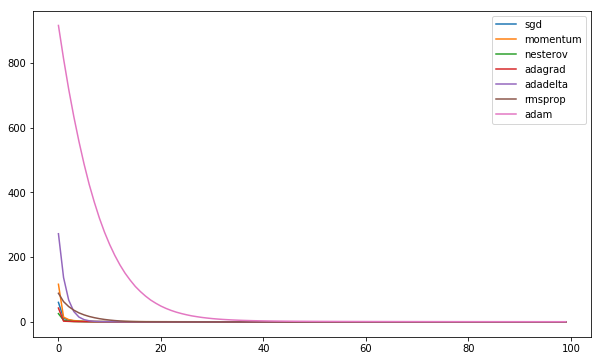

In [23]:
x = range(100)
plt.figure(figsize=(10,6))
plt.plot(x, sgd_epoch_list, label='sgd')
plt.plot(x, momentum_epoch_list, label='momentum')
plt.plot(x, nesterov_epoch_list, label='nesterov')
plt.plot(x, adagrad_epoch_list, label='adagrad')
plt.plot(x, adadelta_epoch_list, label='adadelta')
plt.plot(x, rmsprop_epoch_list, label='rmsprop')
plt.plot(x, adam_epoch_list, label='adam')
plt.legend()
plt.show()

> __Adagrad__ performs the best with initial hyperparameters.

In [24]:
lr_list = [0.001, 0.01, 0.1]
mntm_list = [0.85, 0.9, 0.95]
rho_list = [0.85, 0.9, 0.95]
beta1_list = [0.9, 0.95, 0.99]
beta2_list = [0.9, 0.95, 0.99]

In [25]:
### SGD

min_sgd_list = [100]*100
min_sgd_lr = 0

for lr in lr_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("sgd", lr = lr)
    _sgd_epoch_list = train(model, X, y, 100, 100, opt)
    if _sgd_epoch_list[-1] < min_sgd_list[-1]:
        min_sgd_list = _sgd_epoch_list
        min_sgd_lr = lr

print (min_sgd_list[-1])
print ("Optimum Learning Rate for SGD:", min_sgd_lr)

[0.15604457]
Optimum Learning Rate for SGD: 0.01


In [26]:
### MOMENTUM

min_momentum_list = [100]*100
min_momentum_lr = 0
min_momentum_mntm = 0

for lr in lr_list:
    for mntm in mntm_list:
        model = MLP(X.shape[1], 100, 1)
        opt = optimizer("momentum", lr = lr, mntm = mntm, nesterov = False)
        _momentum_epoch_list = train(model, X, y, 100, 100, opt)
        if _momentum_epoch_list[-1] < min_momentum_list[-1]:
            min_momentum_list = _momentum_epoch_list
            min_momentum_lr = lr
            min_momentum_mntm = mntm

print (min_momentum_list[-1])
print ("Optimum Learning Rate for Momentum:", min_momentum_lr)
print ("Optimum Momentum Term for Momentum:", min_momentum_mntm)

[0.14691101]
Optimum Learning Rate for Momentum: 0.01
Optimum Momentum Term for Momentum: 0.9


In [27]:
### NESTEROV

min_nesterov_list = [100]*100
min_nesterov_lr = 0
min_nesterov_mntm = 0

for lr in lr_list:
    for mntm in mntm_list:
        model = MLP(X.shape[1], 100, 1)
        opt = optimizer("momentum", lr = lr, mntm = mntm, nesterov = True)
        _nesterov_epoch_list = train(model, X, y, 100, 100, opt)
        if _nesterov_epoch_list[-1] < min_nesterov_list[-1]:
            min_nesterov_list = _nesterov_epoch_list
            min_nesterov_lr = lr
            min_nesterov_mntm = mntm
            
print (min_nesterov_list[-1])
print ("Optimum Learning Rate for Nesterov Momentum:", min_nesterov_lr)
print ("Optimum Momentum Term for Nesterov Momentum:", min_nesterov_mntm)

[0.25311725]
Optimum Learning Rate for Nesterov Momentum: 0.001
Optimum Momentum Term for Nesterov Momentum: 0.95


In [28]:
### ADAGRAD

min_adagrad_list = [100]*100
min_adagrad_lr = 0

for lr in lr_list:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("adagrad", lr = lr, eps = 1e-06)
    _adagrad_epoch_list = train(model, X, y, 100, 100, opt)
    if _adagrad_epoch_list[-1] < min_adagrad_list[-1]:
        min_adagrad_list = _adagrad_epoch_list
        min_adagrad_lr = lr
        
print (min_adagrad_list[-1])
print ("Optimum Learning Rate for Adagrad:", min_adagrad_lr)

[0.17506184]
Optimum Learning Rate for Adagrad: 0.1


In [29]:
### ADADELTA

min_adadelta_list = [100]*100
min_adadelta_rho = 0

for lr in lr_list:
    for rho in rho_list:
        model = MLP(X.shape[1], 100, 1)
        opt = optimizer("adadelta", rho = rho, eps = 1e-06)
        _adadelta_epoch_list = train(model, X, y, 100, 100, opt)
        if _adadelta_epoch_list[-1] < min_adadelta_list[-1]:
            min_adadelta_list = _adadelta_epoch_list
            min_adadelta_rho = rho
            
print (min_adadelta_list[-1])
print ("Optimum Rho for Adadelta:", min_adadelta_rho)

[0.18373093]
Optimum Rho for Adadelta: 0.95


In [30]:
### RMSPROP

min_rmsprop_list = [100]*100
min_rmsprop_lr = 0
min_rmsprop_rho = 0

for lr in lr_list:
    for rho in rho_list:
        model = MLP(X.shape[1], 100, 1)
        opt = optimizer("rmsprop", lr = lr, rho = rho, eps = 1e-06)
        _rmsprop_epoch_list = train(model, X, y, 100, 100, opt)
        if _rmsprop_epoch_list[-1] < min_rmsprop_list[-1]:
            min_rmsprop_list = _rmsprop_epoch_list
            min_rmsprop_lr = lr
            min_rmsprop_rho = rho
            
print (min_rmsprop_list[-1])
print ("Optimum Learning Rate for RMSProp:", min_rmsprop_lr)
print ("Optimum Rho for RMSProp:", min_rmsprop_rho)

[0.16937058]
Optimum Learning Rate for RMSProp: 0.001
Optimum Rho for RMSProp: 0.9


In [31]:
### ADAM

min_adam_list = [100]*100
min_adam_lr = 0
min_adam_beta1 = 0
min_adam_beta2 = 0

for lr in lr_list:
    for beta1 in beta1_list:
        for beta2 in beta2_list:
            model = MLP(X.shape[1], 100, 1)
        opt = optimizer("adam", lr = lr, beta1 = beta1, beta2 = beta2, eps = 1e-04)
        _adam_epoch_list = train(model, X, y, 100, 100, opt)
        if _adam_epoch_list[-1] < min_adam_list[-1]:
            min_adam_list = _adam_epoch_list
            min_adam_lr = lr
            min_adam_beta1 = beta1
            min_adam_beta2 = beta2
            
print (min_adam_list[-1])
print ("Optimum Learning Rate for Adam:", min_adam_lr)
print ("Optimum Beta1 for Adam:", min_adam_beta1)
print ("Optimum Beta2 for Adam:", min_adam_beta2)

[0.14795103]
Optimum Learning Rate for Adam: 0.01
Optimum Beta1 for Adam: 0.95
Optimum Beta2 for Adam: 0.99


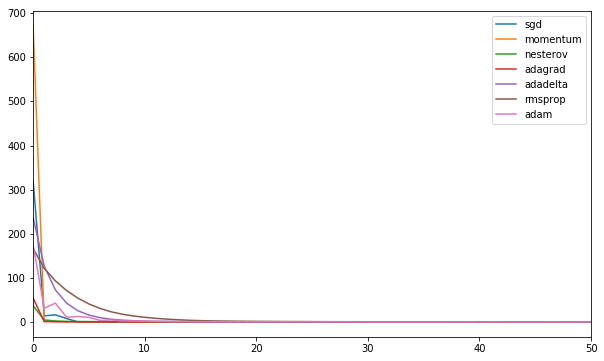

In [32]:
plt.figure(figsize=(10,6))
plt.xlim(0,50)
plt.plot(x, min_sgd_list, label='sgd')
plt.plot(x, min_momentum_list, label='momentum')
plt.plot(x, min_nesterov_list, label='nesterov')
plt.plot(x, min_adagrad_list, label='adagrad')
plt.plot(x, min_adadelta_list, label='adadelta')
plt.plot(x, min_rmsprop_list, label='rmsprop')
plt.plot(x, min_adam_list, label='adam')
plt.legend()
plt.show()

> As seen in the above graph, the optimizers performance improves when experimenting with the hyperparameters and choosing the best one.